In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

Download table: http://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/842/83/table3

In [19]:
possible_singles = (np.array([len(i)==0 for i in douglas['Bin_']]) &  # Not binaries
                    np.array([i == "Y" for i in douglas['Clean_']]) & # Clean periodograms
                    np.array([i == "N" for i in douglas['Bl_']]) )    # Not blends
douglas_singles = douglas[possible_singles]

[Text(0, 0.5, 'log Amplitude'), Text(0.5, 0, 'log Period')]

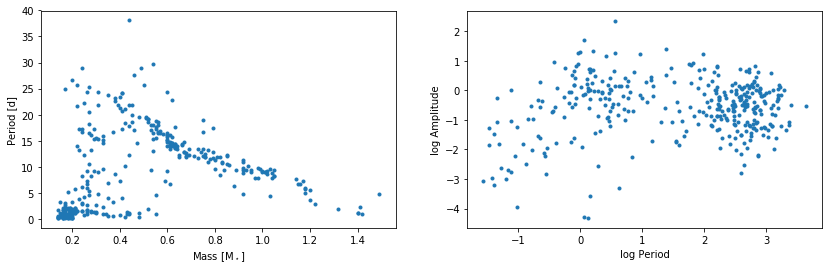

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].scatter(douglas_singles['Mass'], douglas_singles['Prot1'], marker='.')
ax[0].set(xlabel='Mass [M$_\star$]', ylabel='Period [d]')
ax[1].scatter(np.log(douglas_singles['Prot1']), np.log(douglas_singles['SmAmp']), marker='.')
ax[1].set(xlabel='log Period', ylabel='log Amplitude')

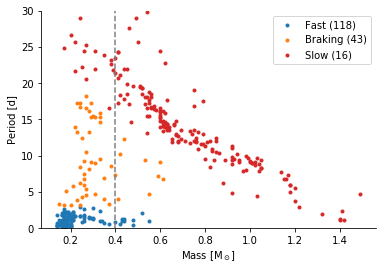

In [159]:
fast_low_mass = (douglas_singles['Mass'] < 0.6) & (douglas_singles['Prot1'] < 3)
slow = -25 * douglas_singles['Mass'] + 25 < douglas_singles['Prot1']
intermediate = np.logical_not(fast_low_mass | slow)

low_mass = douglas_singles['Mass'] < 0.4

plt.scatter(douglas_singles['Mass'][fast_low_mass], douglas_singles['Prot1'][fast_low_mass], 
            marker='.', label='Fast ({})'.format(np.count_nonzero(douglas_singles['Mass'][fast_low_mass] < 0.4)))
plt.scatter(douglas_singles['Mass'][intermediate], douglas_singles['Prot1'][intermediate], 
            marker='.', label='Braking ({})'.format(np.count_nonzero(douglas_singles['Mass'][intermediate] < 0.4)))
plt.scatter(douglas_singles['Mass'][slow], douglas_singles['Prot1'][slow], marker='.', 
            label='Slow ({})'.format(np.count_nonzero(douglas_singles['Mass'][slow] < 0.4)), color='C3')
plt.legend()
plt.axvline(0.4, ls='--', color='gray')
plt.ylim([0, 30])
for s in ['right', 'top']: 
    plt.gca().spines[s].set_visible(False)
plt.xlabel('Mass [$\\rm M_\odot$]')
plt.ylabel('Period [d]')
plt.savefig('plots/mass-period.pdf', bbox_inches='tight')

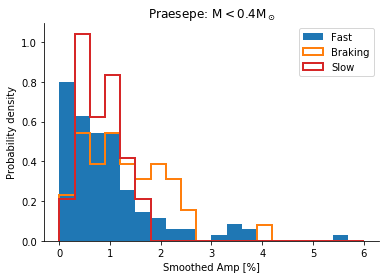

In [169]:
bins = 20
bin_range = [0, 6]

np.savetxt('data/lowmass_fast.txt', douglas_singles['SmAmp'][low_mass & fast_low_mass])
np.savetxt('data/lowmass_intermediate.txt', douglas_singles['SmAmp'][low_mass & intermediate])
np.savetxt('data/lowmass_slow.txt', douglas_singles['SmAmp'][low_mass & slow])

plt.hist(douglas_singles['SmAmp'][low_mass & fast_low_mass], bins=bins, 
         range=bin_range, density=True, alpha=1, histtype='stepfilled', lw=2, label='Fast')
plt.hist(douglas_singles['SmAmp'][low_mass & intermediate], bins=bins, 
         range=bin_range,density=True, alpha=1, histtype='step', lw=2, label='Braking')
plt.hist(douglas_singles['SmAmp'][low_mass & slow], bins=bins,
         range=bin_range, density=True, alpha=1, histtype='step', lw=2, label='Slow', color='C3')
for s in ['right', 'top']: 
    plt.gca().spines[s].set_visible(False)
plt.legend()
plt.gca().set(xlabel='Smoothed Amp [%]', ylabel='Probability density', 
              title='Praesepe: $\\rm M < 0.4 M_\odot$')
plt.savefig('plots/mass-period_smamp.pdf')

In [95]:
from sklearn.neighbors.kde import KernelDensity

douglas_small_fast = douglas_singles[(douglas_singles['Mass'] > 0.2) & (douglas_singles['Mass'] < 0.4) & 
                                (douglas_singles['Prot1'] < 5)]
X = np.sort(douglas_small_fast['SmAmp'].data.data)[:, np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
scores = np.exp(kde.score_samples(X))
# plt.plot(X, scores)

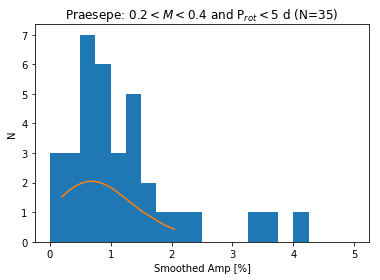

In [103]:
fig, ax = plt.subplots()
bin_range = [0, 5]
ax.hist(douglas_small_fast['SmAmp'], bins=20, range=bin_range)
ax.plot(X, scores*np.max(X)/scores.max())
np.savetxt('data/kde_fast.txt', np.vstack([X.T, scores]).T)
np.savetxt('data/amps_fast.txt', douglas_small_fast['SmAmp'])
ax.set(xlabel='Smoothed Amp [%]', ylabel='N', 
       title='Praesepe: $0.2 < M < 0.4$ and P$_{{rot}} < 5$ d (N={})'.format(len(douglas_small['SmAmp'])))
fig.savefig('plots/amplitudes_fast.pdf')
plt.show()

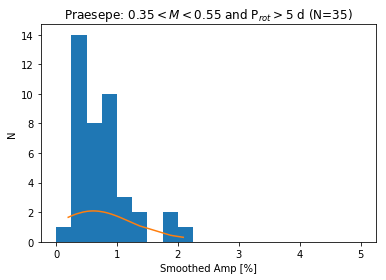

In [105]:
from sklearn.neighbors.kde import KernelDensity

douglas_small_slow = douglas_singles[(douglas_singles['Mass'] > 0.35) & (douglas_singles['Mass'] < 0.55) & 
                                (douglas_singles['Prot1'] > 5)]
X = np.sort(douglas_small_slow['SmAmp'].data.data)[:, np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
scores = np.exp(kde.score_samples(X))

fig, ax = plt.subplots()
ax.hist(douglas_small_slow['SmAmp'], bins=20, range=bin_range)
ax.plot(X, scores*np.max(X)/scores.max())
np.savetxt('data/kde_slow.txt', np.vstack([X.T, scores]).T)
np.savetxt('data/amps_slow.txt', douglas_small_slow['SmAmp'])
ax.set(xlabel='Smoothed Amp [%]', ylabel='N', 
       title='Praesepe: $0.35 < M < 0.55$ and P$_{{rot}} > 5$ d (N={})'.format(len(douglas_small['SmAmp'])))
fig.savefig('plots/amplitudes_slow.pdf')
plt.show()